# Training visual prosthesis using Convolutional Neural Network

## 1/ Context
Retinal implants are ....

import some images

In [66]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
import os
import random

mpl.rc('image', cmap='gray_r')

## The first-test transformation: a one row translation to the left
For the first try, we use a translation transformation based on a 4 by 4 pixels image in black and white.
We can easily build the transformation matrices that will generate the "mangled" image based on a real input, as well as the transformation that will generate the corrected input.

$ P = \begin{bmatrix} 0 & 0 & 0 &1\\
                      1 & 0 & 0 & 0\\
                      0 & 1 & 0 & 0\\
                      0 & 0 & 1 & 0
        \end{bmatrix} $ and 
$ P^{\star} = \begin{bmatrix} 0 & 1 & 0 &0\\
                      0 & 0 & 1 & 0\\
                      0 & 0 & 0 & 1\\
                      1 & 0 & 0 & 0
        \end{bmatrix} $
        
$M_{mangled} = M_{real}P $ and  $M^{\star} = M_{real}P^{\star} $

In [82]:
# Transformation matrices
P = np.array([[0, 0, 0, 1],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])
Pstar = np.array([[0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [1, 0, 0, 0]])

In [79]:
# real image
Mreal = np.array([[0, 0, 0, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0]])
Mreal = np.ones((4,4)) - Mreal
# distorted image
Mmang = Mreal@P
# corrected input
Mstar = Mreal@Pstar


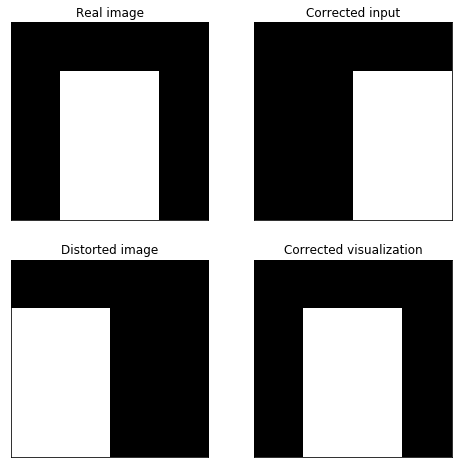

In [81]:
# plt.figure(1)
def remove_ticks():
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off    
    return

def vis_matrices(Mr, Mm, Mst, P):
    if Mr.shape[0]==1:
        Mr = Mr.reshape(int(np.sqrt(Mr.shape[1])), int(np.sqrt(Mr.shape[1])))
        Mm = Mm.reshape(int(np.sqrt(Mm.shape[1])), int(np.sqrt(Mm.shape[1])))
        Mst = Mst.reshape(int(np.sqrt(Mst.shape[1])), int(np.sqrt(Mst.shape[1])))
    
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2) #, squeeze=True, sharey=True)
    fig.set_size_inches(8,8)

    plt.sca(ax1[0])
    plt.imshow(Mr)
    plt.title("Real image")
    remove_ticks()

    plt.sca(ax2[0])
    plt.imshow(Mm)
    plt.title("Distorted image")
    remove_ticks()

    plt.sca(ax1[1])
    plt.imshow(Mst)
    plt.title("Corrected input")
    remove_ticks()

    plt.sca(ax2[1])
    plt.imshow(Mst@P)
    plt.title("Corrected visualization")
    remove_ticks()
    
    
vis_matrices(Mreal, Mmang, Mstar, P)

## Machine-Learning approach

In [5]:
nbpix = 4


In [22]:
# let's try to train the model with only one pixel on each figure. 
# then we can use categorical for the result: the cqtegory being the position of the pixel.
# input a grid, output a position between one to 16

# Generating the training data.
idx = range(0,nbpix**2,1)

Mreal_tab = np.zeros((len(idx),nbpix*nbpix))
Mmang_tab = np.zeros((len(idx),nbpix*nbpix))
Mstar_tab = np.zeros((len(idx),nbpix*nbpix))

for ii in idx:
    Mreal_tab[ii,ii] = 1
    Mmang_tab[ii,:] = (Mreal_tab[ii,:].reshape(nbpix,nbpix)@P).reshape(1,nbpix**2)
    Mstar_tab[ii,:] = (Mreal_tab[ii,:].reshape(nbpix,nbpix)@Pstar).reshape(1,nbpix**2)

    

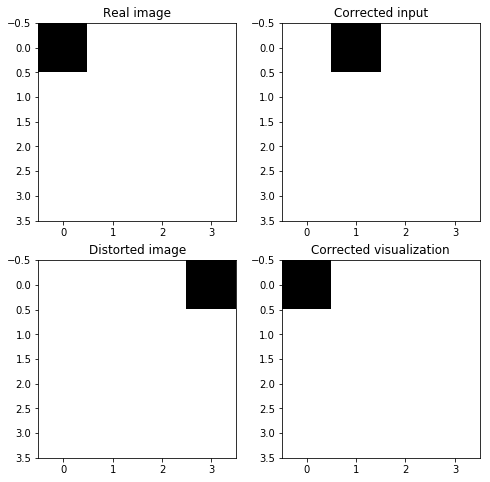

In [23]:
n = 0
vis_matrices(Mreal_tab[n,:].reshape(nbpix,nbpix), Mmang_tab[n,:].reshape(nbpix,nbpix), Mstar_tab[n,:].reshape(nbpix,nbpix), P)    

In [24]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

In [25]:
# the training input will the matrix of the real images with one pixel
X_train = Mreal_tab

In [28]:
# the training output will be the category corresponding to the position of the pixel in the mangled image
y_train = [np.where(Mmang_tab[ii,:]==1)[0].item(0) for ii in idx]
y_train = to_categorical(y_train, nbpix**2)
print(y_train)

y_train_cor = [np.where(Mstar_tab[ii,:]==1)[0].item(0) for ii in idx]
y_train_cor = to_categorical(y_train_cor, nbpix**2)
# y_train_cor
y_train_cor

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [29]:
# creating the models
model_mangler = Sequential()
model_mangler.add(Dense(100, activation='relu', input_dim=nbpix**2))
model_mangler.add(Dense(100, activation='relu'))
model_mangler.add(Dense(nbpix**2, activation='softmax'))
# Inversion strategy doesnt work very well...
# we are going to try using another model, trained on the corrected input.
model_corrector = Sequential()
model_corrector.add(Dense(100, activation='relu', input_dim=nbpix**2))
model_corrector.add(Dense(100, activation='relu'))
model_corrector.add(Dense(nbpix**2, activation='softmax'))

In [30]:
# Compile the models
model_mangler.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model_corrector.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [32]:
print(model_mangler.summary())
print(model_corrector.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1616      
Total params: 13,416
Trainable params: 13,416
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
d

In [33]:
# train the model
model_mangler.fit( X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 2.7691 - acc: 0.0625
Epoch 2/100
 - 0s - loss: 2.7526 - acc: 0.0625
Epoch 3/100
 - 0s - loss: 2.7312 - acc: 0.1250
Epoch 4/100
 - 0s - loss: 2.7103 - acc: 0.2500
Epoch 5/100
 - 0s - loss: 2.6899 - acc: 0.3125
Epoch 6/100
 - 0s - loss: 2.6700 - acc: 0.3125
Epoch 7/100
 - 0s - loss: 2.6505 - acc: 0.3125
Epoch 8/100
 - 0s - loss: 2.6309 - acc: 0.3750
Epoch 9/100
 - 0s - loss: 2.6115 - acc: 0.5000
Epoch 10/100
 - 0s - loss: 2.5921 - acc: 0.5625
Epoch 11/100
 - 0s - loss: 2.5723 - acc: 0.5625
Epoch 12/100
 - 0s - loss: 2.5524 - acc: 0.6250
Epoch 13/100
 - 0s - loss: 2.5323 - acc: 0.6875
Epoch 14/100
 - 0s - loss: 2.5122 - acc: 0.7500
Epoch 15/100
 - 0s - loss: 2.4916 - acc: 0.8750
Epoch 16/100
 - 0s - loss: 2.4710 - acc: 0.8750
Epoch 17/100
 - 0s - loss: 2.4500 - acc: 0.9375
Epoch 18/100
 - 0s - loss: 2.4287 - acc: 0.9375
Epoch 19/100
 - 0s - loss: 2.4066 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 2.3839 - acc: 1.0000
Epoch 21/100
 - 0s - loss: 2.3607 - acc: 1.0000
E

In [41]:
model_corrector.fit( X_train,
    y_train_cor,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 4.8521 - acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 4.8149 - acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 4.7296 - acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 4.6113 - acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 4.4697 - acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 4.3125 - acc: 0.0000e+00
Epoch 7/100
 - 0s - loss: 4.1452 - acc: 0.0000e+00
Epoch 8/100
 - 0s - loss: 3.9724 - acc: 0.0000e+00
Epoch 9/100
 - 0s - loss: 3.7980 - acc: 0.0000e+00
Epoch 10/100
 - 0s - loss: 3.6248 - acc: 0.0000e+00
Epoch 11/100
 - 0s - loss: 3.4546 - acc: 0.0000e+00
Epoch 12/100
 - 0s - loss: 3.2890 - acc: 0.0000e+00
Epoch 13/100
 - 0s - loss: 3.1295 - acc: 0.0000e+00
Epoch 14/100
 - 0s - loss: 2.9762 - acc: 0.0000e+00
Epoch 15/100
 - 0s - loss: 2.8302 - acc: 0.0000e+00
Epoch 16/100
 - 0s - loss: 2.6917 - acc: 0.0000e+00
Epoch 17/100
 - 0s - loss: 2.5605 - acc: 0.0000e+00
Epoch 18/100
 - 0s - loss: 2.4367 - acc: 0.0000e+00
Epoch 19/100
 - 0s - loss: 2.3200 - acc: 0.0000e+00
Epoch 20/100
 - 0s - 

In [42]:
test = np.expand_dims(X_train[0], axis=0)
# print(X_train[0])
# print(test.shape)
res = model_mangler.predict(test)
res2 = model_corrector.predict(test)
print(test)
print(res)
print(res2)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[8.5316990e-03 1.7896872e-02 3.1383974e-03 9.3370426e-01 3.2650901e-03
  1.3884827e-03 1.8099438e-03 5.6397412e-03 1.4062021e-03 6.3266279e-03
  8.8376174e-04 1.4071506e-03 2.1530050e-03 4.7008060e-03 1.4195780e-03
  6.3284016e-03]]
[[1.6577238e-04 9.1190600e-01 1.2485256e-03 7.4313223e-02 6.9913117e-04
  7.2287308e-04 1.4869982e-03 1.2628357e-03 1.7105436e-03 7.6492009e-04
  6.3333235e-04 1.4506519e-03 6.9405249e-04 1.3334395e-03 3.4089005e-04
  1.2667577e-03]]


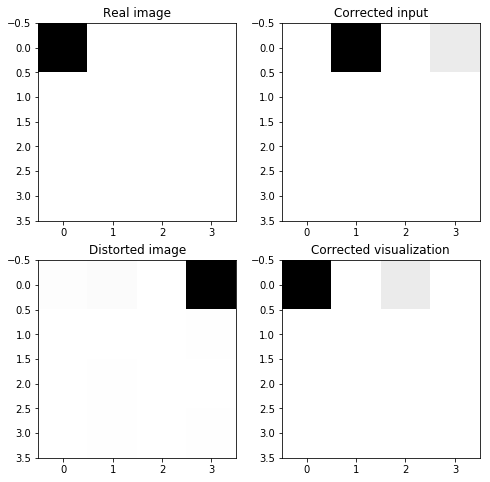

In [43]:
vis_matrices(test,res,res2,P)
# plt.imshow(res.reshape(4,4))
# plt.colorbar()
# plt.show()

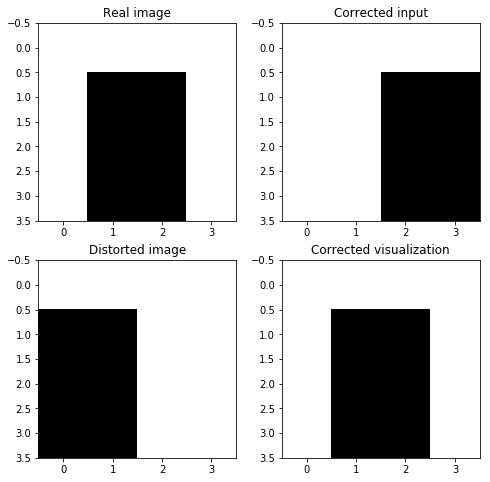

In [50]:
# Now let's use one of the random images, split it up into one pixel images and predict the mangled result
# then, we find the transformation matrix and invert it and tadaaaaa!
# cut = 0.4
# Mreal = np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cut, cut])
Mreal = np.array([[0, 0, 0, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0]])
Mmang = Mreal@P
Mstar = Mreal@Pstar
vis_matrices(Mreal, Mmang, Mstar, P)

(1, 16)


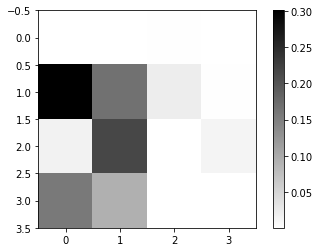

In [51]:
# let's try to use directly the trained model
test = np.expand_dims(Mreal.reshape(1,nbpix**2)[0], axis=0)
print(test.shape)
res = model_mangler.predict(test)
plt.imshow(res.reshape(4,4))
plt.colorbar()
plt.show()

In [61]:
# let's split the Mreal matrix into n matrices of one pixel
def add_one(arr,index):
    arr[0,index] = 1
    return arr
# find the indexes of the ones values in the matrix
idx_arr = np.where(Mreal.reshape(1,nbpix**2)[0]==1)[0]
idx_lst = [idx_arr.item(ii) for ii in range(0,len(idx_arr))] # transform from an array to a list

temp = np.zeros((1,nbpix**2))
Mreal_split = np.zeros((len(idx_lst), nbpix**2))
Mtest = np.zeros((nbpix,nbpix))
for ii in range(0,len(idx_lst)):
    Mreal_split[ii,idx_lst[ii]] = 1    
    Mtest = Mtest + Mreal_split[ii,:].reshape(nbpix,nbpix)
Mtest
Mreal_split

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

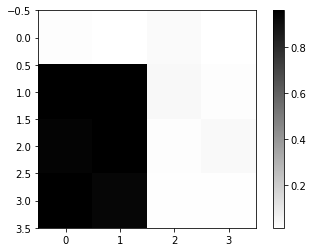

array([[0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [62]:
# then lets use the trained models to predict the mangled response and the corrected input response
# of all of these one pixel image
# and we rebuild the full image by adding up all the result matrixes
res = np.zeros((len(idx_lst), nbpix**2))
Mres = np.zeros((nbpix,nbpix))
Mcor = np.zeros((nbpix,nbpix))
for ii in range(0,len(idx_lst)):
    res[ii,:] = model_mangler.predict(np.expand_dims(Mreal_split[ii], axis=0))
    Mres = Mres + res[ii,:].reshape(nbpix,nbpix)
    Mcor = Mcor + Mcor[ii,:].reshape(nbpix,nbpix)
# Mres
plt.imshow(Mres)
plt.colorbar()
plt.show()
# res.round()
# Mres.round()

In [63]:
# Now that we have the Mreal and the Mres
# let's calculate the estimated transformation matrix
print(np.linalg.det(Mreal))
Pest = np.linalg.pinv(Mreal,rcond=1e-15)@Mres
Pest

0.0


array([[0.        , 0.        , 0.        , 0.        ],
       [0.47678987, 0.47612997, 0.01551458, 0.01487812],
       [0.47678987, 0.47612997, 0.01551458, 0.01487812],
       [0.        , 0.        , 0.        , 0.        ]])

In [64]:
Pstar_est = np.linalg.pinv(Pest)
Pstar_est

array([[0.        , 0.5245324 , 0.5245324 , 0.        ],
       [0.        , 0.52380642, 0.52380642, 0.        ],
       [0.        , 0.01706811, 0.01706811, 0.        ],
       [0.        , 0.01636792, 0.01636792, 0.        ]])

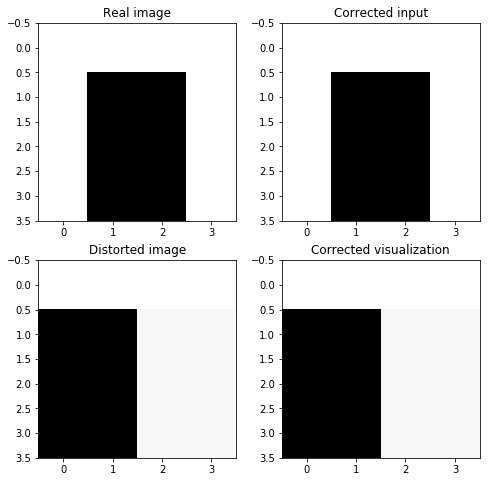

In [65]:
Mmang2 = Mreal@Pest
Mstar2 = Mreal@Pstar_est
vis_matrices(Mreal, Mmang2, Mstar2, Pest)

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [ ]:
train_idx = np.sort(random.sample(range(1, nb_sample), round(0.7*nb_sample)))

X_train = Mreal_tab[train_idx]
X_test = np.delete(Mreal_tab, train_idx, 0)

y_train = Mstar_tab[train_idx]
y_test =np.delete(Mstar_tab, train_idx, 0)


print(X_train.shape)
print(X_test.shape)

# df2 = data.drop_duplicates()
# df2.count()
n = 30
vis_matrices(X_train[n,:].reshape(nbpix,nbpix), X_train[n,:].reshape(nbpix,nbpix)@P, y_train[n,:].reshape(nbpix,nbpix), P)

- an artificial feed-forward-type multi-layer neural network configured, e.g., using the Error-Backpropagation algorithm; 
- a Hopfield-type Attractor neural network configured with, e.g., the Projection Rule or the Pseudoinverse algorithm; 
- and/or a recurrent neural network trained, e.g., with algo rithms such as Real-Time Recurrent Learning algorithm and the Time-Dependent Recurrent Backpropagation to determine a vision solution. 

In [ ]:
# df_train = data.sample(0.8)
# df_test = data.sample(2000)
model = Sequential()

In [ ]:
# first hiden layer
